# Import all kind of stuff

In [22]:
import numpy as np

from matplotlib.markers import MarkerStyle
from matplotlib.lines import Line2D

import superconductivity.api as sc

from superconductivity.api import G_0_muS
from superconductivity.api import NDArray64

from IPython import get_ipython

_ip = get_ipython()
if _ip is not None:
    _ip.run_line_magic("reload_ext", "autoreload")
    _ip.run_line_magic("autoreload", "2")

    _ip.run_line_magic(
        "config",
        "InlineBackend.print_figure_kwargs = {'bbox_inches': None, 'pad_inches': 0.0}",
    )
    _ip.run_line_magic("config", 'InlineBackend.figure_format = "retina"')  # or "png"
    _ip.run_line_magic(
        "config", "InlineBackend.rc = {'figure.dpi': 300}"
    )  # choose a value you like

# btk - dos
for Gamma = 0.0, Gamma/Delta = 0.05

In [23]:
Delta_meV = 0.180
gamma_meV = 0.0
T_K = 0.0

tau = np.array([1.0, 0.66, 0.33, 0.1])
V_mV = np.linspace(0, 2.5 * Delta_meV, 501)

I = np.full((tau.shape[0], V_mV.shape[0]), np.nan)
dIdV = np.copy(I)
N_1e = np.copy(I)
N_2e = np.copy(I)
for i, tau_i in enumerate(tau):
    Z = sc.get_Z_btk(tau_i)
    A, B = sc.get_AB_btk(
        E_meV=V_mV,
        Delta_meV=Delta_meV,
        Z=Z,
        gamma_meV=gamma_meV,
    )
    N_1e[i, :] = (1 - A - B) / tau_i
    N_2e[i, :] = 2 * A / tau_i

    I_nA = sc.get_I_btk_nA(
        V_mV=V_mV,
        Delta_meV=Delta_meV,
        tau=tau_i,
        T_K=T_K,
        gamma_meV=gamma_meV,
    )[:, 0]
    dIdV[i, :] = np.gradient(I_nA, V_mV, axis=0) / G_0_muS / tau_i
    I[i, :] = I_nA / (G_0_muS * tau_i * Delta_meV)

/Users/oliver/Documents/superconductivity/superconductivity/models/btk.py:34: RuntimeWarning: overflow encountered in square
  etta2 = np.square(etta)
/Users/oliver/Documents/superconductivity/superconductivity/models/btk.py:37: RuntimeWarning: overflow encountered in square
  gamma2 = np.square(alpha + Z2 * diff) + np.square(etta * (2.0 * Z2 + 1.0))
/Users/oliver/Documents/superconductivity/superconductivity/models/btk.py:39: RuntimeWarning: invalid value encountered in divide
  A = np.sqrt(np.abs((alpha2 + etta2) * (beta2 + etta2))) / gamma2
/Users/oliver/Documents/superconductivity/superconductivity/models/btk.py:40: RuntimeWarning: overflow encountered in square
  term1 = np.square(diff * Z - 2.0 * etta)
/Users/oliver/Documents/superconductivity/superconductivity/models/btk.py:42: RuntimeWarning: invalid value encountered in multiply
  B = (Z2 * (term1 + term2)) / gamma2
/Users/oliver/Documents/superconductivity/superconductivity/models/btk.py:41: RuntimeWarning: overflow encounter

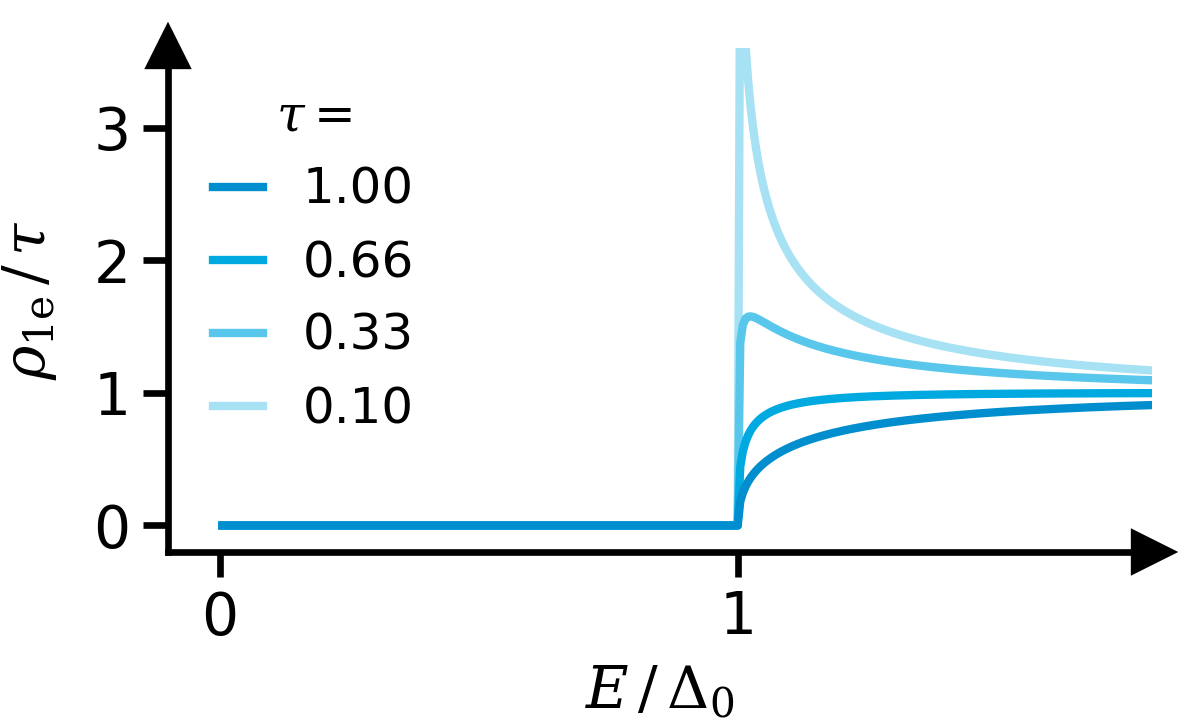

In [24]:
fig, ax = sc.get_figure(figsize=(2, 1.2))

for i, tau_i in enumerate(tau):
    ax.plot(
        V_mV / Delta_meV,
        N_1e[i, :],
        color=sc.seeblau[i],
        zorder=10 - i,
        label=f"{tau_i:.2f}",
    )

ax.set_xlim(-0.1, 1.8)
ax.set_ylim(-0.2, 3.6)
ax.set_yticks([0, 1, 2, 3])
ax.set_xticks([0, 1])

ax.legend(
    title="$\\tau = $",
    handlelength=1.0,
    loc="upper left",
    frameon=False,
    fontsize=6,
    title_fontsize=6,
    ncols=1,
    columnspacing=1.0,
)

ylabel = "$\\rho_\\mathrm{1e}\\,/\\,\\tau$"
xlabel = "$E\\,/\\,\\Delta_0$"
title = "theory/meso/btk-1e-dos"

sc.theory_layout(fig, ax, title, xlabel, ylabel)

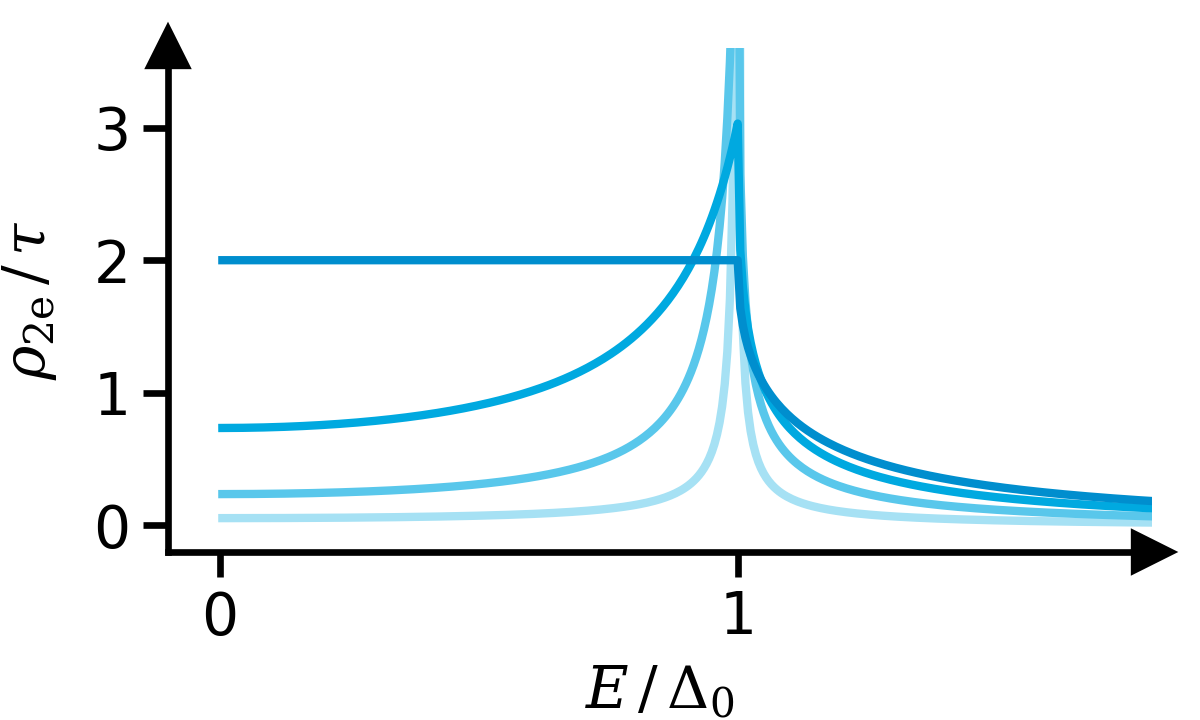

In [25]:
fig, ax = sc.get_figure(figsize=(2, 1.2))

for i, tau_i in enumerate(tau):
    ax.plot(
        V_mV / Delta_meV,
        N_2e[i, :],
        color=sc.seeblau[i],
        zorder=10 - i,
        label=f"{tau_i:.1f}",
    )

ax.set_xlim(-0.1, 1.8)
ax.set_ylim(-0.2, 3.6)
ax.set_yticks([0, 1, 2, 3])
ax.set_xticks([0, 1])

ylabel = "$\\rho_\\mathrm{2e}\\,/\\,\\tau$"
xlabel = "$E\\,/\\,\\Delta_0$"
title = "theory/meso/btk-2e-dos"

sc.theory_layout(fig, ax, title, xlabel, ylabel)

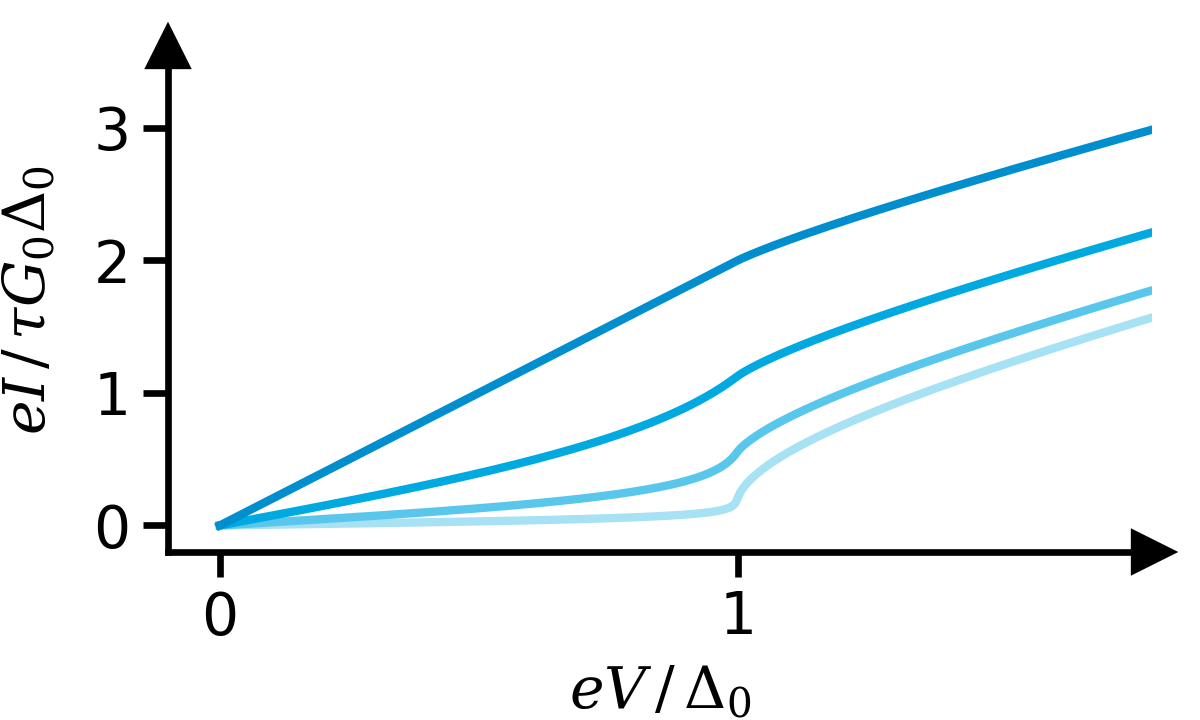

In [26]:
fig, ax = sc.get_figure(figsize=(2, 1.2))

for i, tau_i in enumerate(tau):
    ax.plot(
        V_mV / Delta_meV,
        I[i, :],
        color=sc.seeblau[i],
        zorder=10 - i,
        label=f"{tau_i:.1f}",
    )

ax.set_xlim(-0.1, 1.8)
ax.set_ylim(-0.2, 3.6)
ax.set_yticks([0, 1, 2, 3])
ax.set_xticks([0, 1])

ylabel = "$eI\\,/\\,\\tau G_0\\Delta_0$"
xlabel = "$eV\\,/\\,\\Delta_0$"
title = "theory/meso/btk-iv"

sc.theory_layout(fig, ax, title, xlabel, ylabel)

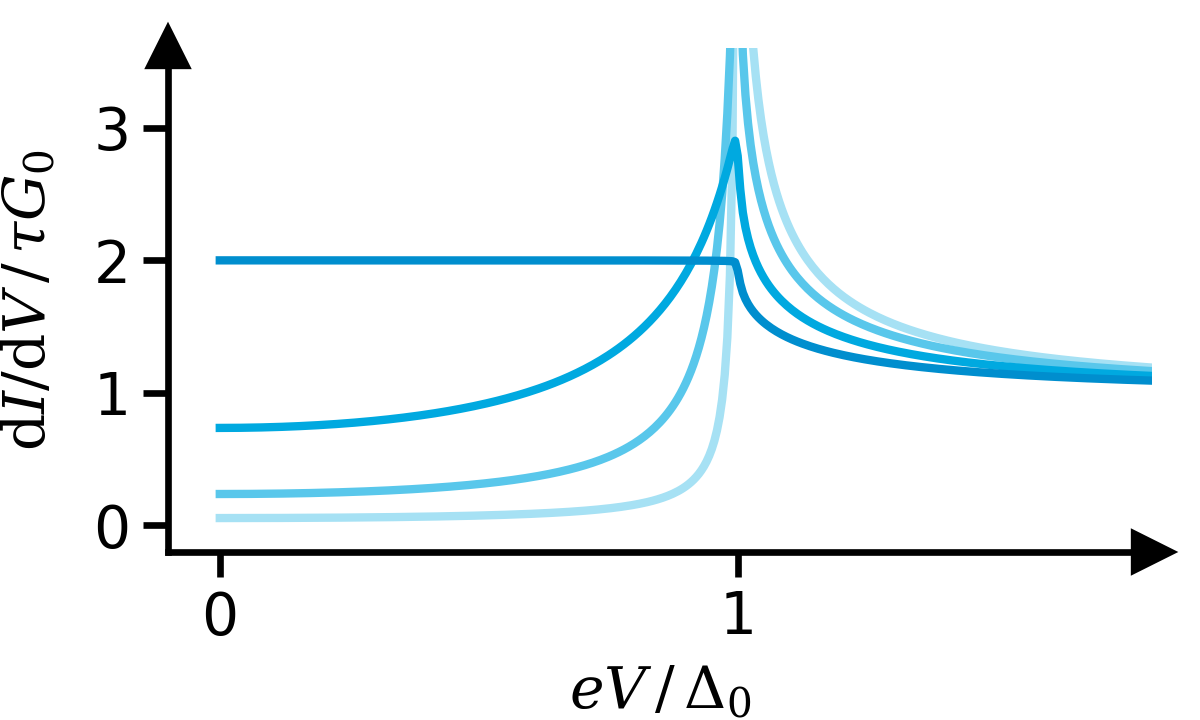

In [27]:
fig, ax = sc.get_figure(figsize=(2, 1.2))

for i, tau_i in enumerate(tau):
    ax.plot(
        V_mV / Delta_meV,
        dIdV[i, :],
        color=sc.seeblau[i],
        zorder=10 - i,
        label=f"{tau_i:.1f}",
    )

ax.set_xlim(-0.1, 1.8)
ax.set_ylim(-0.2, 3.6)
ax.set_yticks([0, 1, 2, 3])
ax.set_xticks([0, 1])

ylabel = "$\\mathrm{d}I/\\mathrm{d}V\\,/\\,\\tau G_0$"
xlabel = "$eV\\,/\\,\\Delta_0$"
title = "theory/meso/btk-didv"

sc.theory_layout(fig, ax, title, xlabel, ylabel)

# ABS

In [28]:
Delta_meV = 0.180
T_K = 0.0

tau = np.array([1.0, 0.95, 0.66, 0.33, 0.1])
phi = np.linspace(0, 2 * np.pi, 361)

E_abs = np.zeros((tau.shape[0], phi.shape[0]))
E_abs_meV = np.copy(E_abs)
I_abs = np.copy(E_abs)
I_abs_nA = np.copy(E_abs)

for i_tau, tau_i in enumerate(tau):
    E_abs[i_tau, :] = sc.get_E_abs(
        phi=phi,
        tau=tau_i,
    )
    I_abs[i_tau, :] = sc.get_cpr_abs(
        phi=phi,
        Delta_meV=Delta_meV,
        tau=tau_i,
        T_K=T_K,
    )

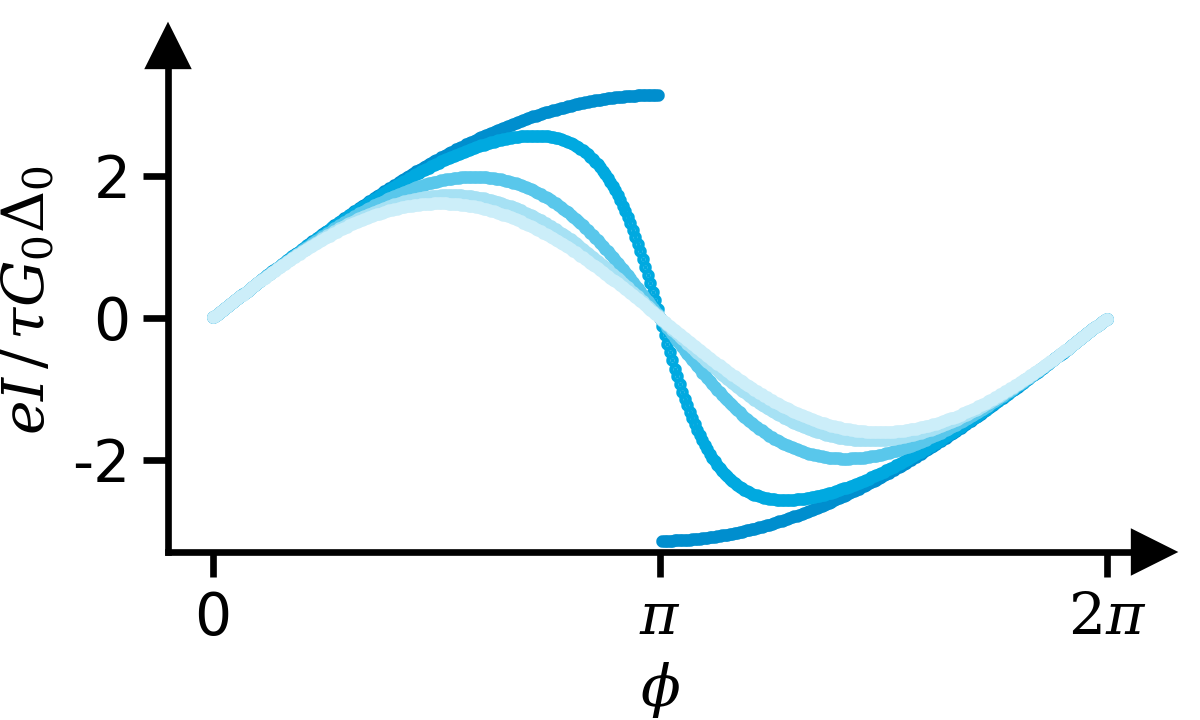

In [29]:
fig, ax = sc.get_figure(figsize=(2, 1.2))
for i, tau_i in enumerate(tau):
    ax.plot(phi, I_abs[i, :] / tau_i, ".", color=sc.seeblau[i])

ax.set_xticks([0, np.pi, np.pi * 2], labels=["0", "$\\pi$", "$2\\pi$"])
ax.set_ylim(-3.3, 3.8)

ylabel = "$eI\\,/\\,\\tau G_0 \\Delta_0$"
xlabel = "$\\phi$"
title = "theory/meso/abs-Iphi"

sc.theory_layout(fig, ax, title, xlabel, ylabel)

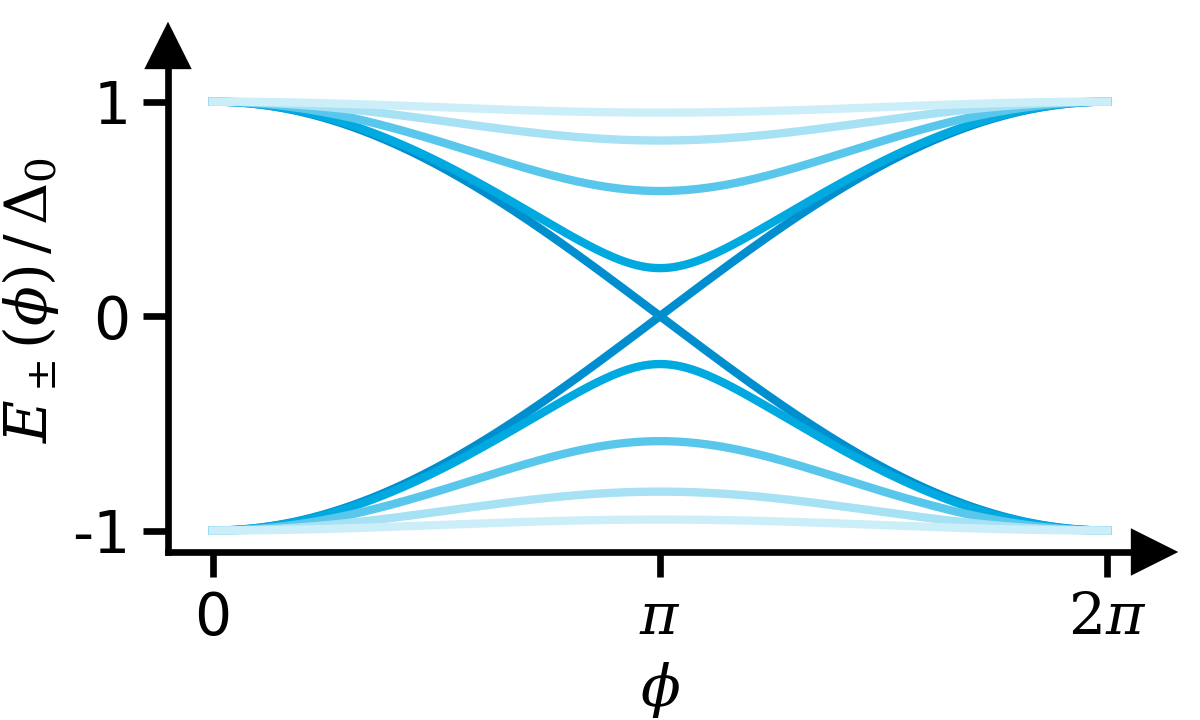

In [30]:
fig, ax = sc.get_figure(figsize=(2, 1.2))
for i, tau_i in enumerate(tau):
    ax.plot(phi, E_abs[i, :], color=sc.seeblau[i])
    ax.plot(phi, -E_abs[i, :], color=sc.seeblau[i])

ax.set_xticks([0, np.pi, np.pi * 2], labels=["0", "$\\pi$", "$2\\pi$"])
ax.set_ylim(-1.1, 1.25)

ylabel = "$E_\\pm(\\phi)\\,/\\,\\Delta_0$"
xlabel = "$\\phi$"
title = "theory/meso/abs-Ephi"

sc.theory_layout(fig, ax, title, xlabel, ylabel)

# Multichannel Contact

In [31]:
tau = np.linspace(0, 1, 101)
phi = np.linspace(0, 1, 101)
phi *= 2 * np.pi

G_N = 1.0
T_K = 0.0
n_phi = 501

rho = sc.get_rho(tau=tau, G_N=G_N)
CPR_AB = sc.get_cpr_ab(phi=phi, Delta_meV=Delta_meV, G_N=G_N, T_K=T_K)
CPR_ABS = sc.get_cpr_abs(phi=phi, Delta_meV=Delta_meV, tau=G_N, T_K=T_K)
CPR_KO2 = sc.get_cpr_ko2(phi=phi, Delta_meV=Delta_meV, G_N=G_N, T_K=T_K)
CPR_KO1 = sc.get_cpr_ko1(phi=phi, Delta_meV=Delta_meV, G_N=G_N, T_K=T_K)

TC_K = sc.get_T_c_K(Delta_meV=Delta_meV)
T = np.linspace(0, 1, 101)
T_K = T * TC_K

I_C_AB = sc.get_IcT_ab(T_K=T_K, Delta_meV=Delta_meV, G_N=G_N)
I_C_ABS = sc.get_IcT_abs(T_K=T_K, Delta_meV=Delta_meV, tau=G_N, n_phi=n_phi)
I_C_KO1 = sc.get_IcT_ko1(T_K=T_K, Delta_meV=Delta_meV, G_N=G_N, n_phi=n_phi)
I_C_KO2 = sc.get_IcT_ko2(T_K=T_K, Delta_meV=Delta_meV, G_N=G_N, n_phi=n_phi)

100%|██████████| 101/101 [00:33<00:00,  3.06it/s]


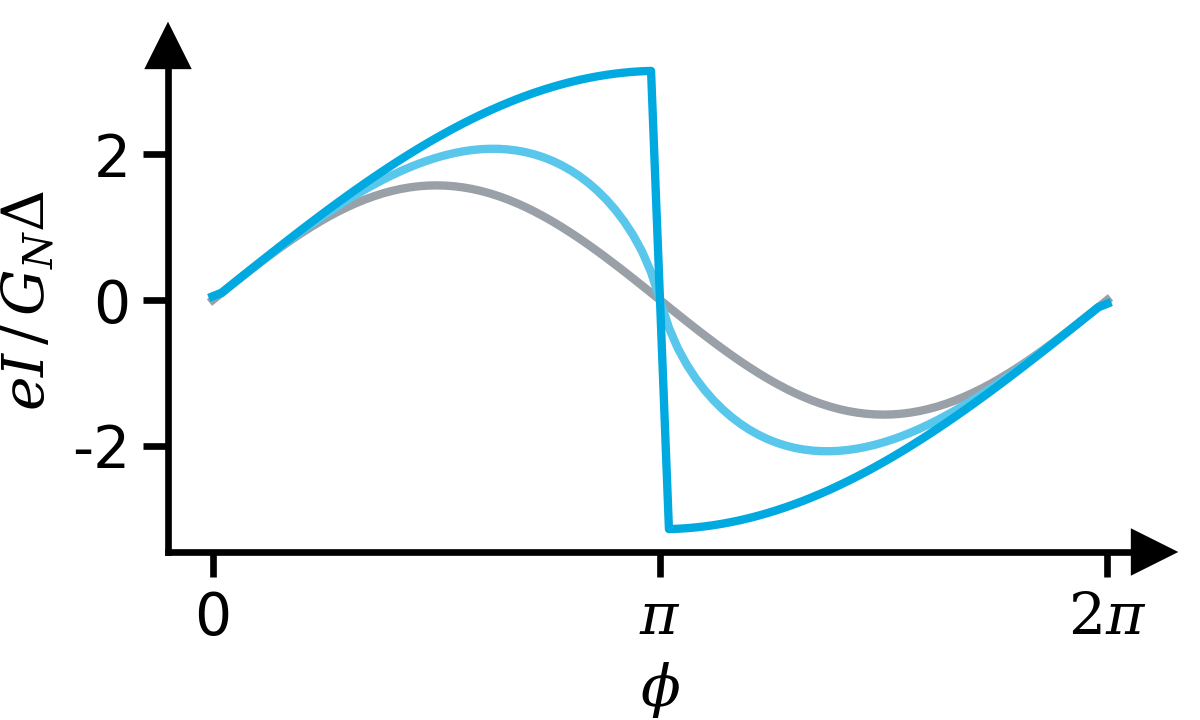

In [32]:
fig, ax = sc.get_figure(figsize=(2.0, 1.2))

ax.plot(phi, CPR_AB, color=sc.seegrau65, label="AB")
ax.plot(phi, CPR_KO1, color=sc.seeblau65, label="KO1")
ax.plot(phi, CPR_KO2, color=sc.seeblau100, label="KO2")

ax.set_xticks([0, np.pi, np.pi * 2], labels=["0", "$\\pi$", "$2\\pi$"])

ylabel = "$eI\\,/\\,G_N \\Delta$"
xlabel = "$\\phi$"
title = "theory/meso/ko-cpr"

sc.theory_layout(fig, ax, title, xlabel, ylabel)

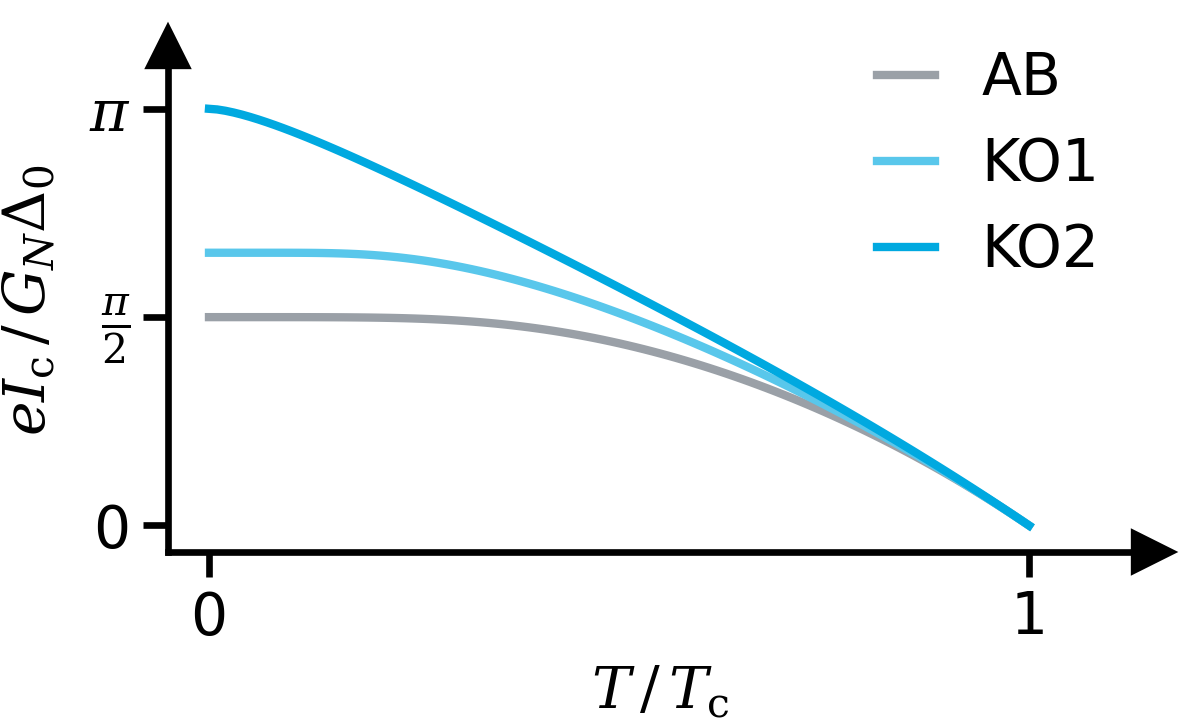

In [33]:
fig, ax = sc.get_figure(figsize=(2.0, 1.2))

ax.plot(T, I_C_AB, color=sc.seegrau65, label="AB")
ax.plot(T, I_C_KO1, color=sc.seeblau65, label="KO1")
ax.plot(T, I_C_KO2, color=sc.seeblau100, label="KO2")

ax.legend()
ax.set_xlim(-0.05, 1.15)
ax.set_xticks([0, 1])
ax.set_ylim(-0.2, 3.6)
ax.set_yticks([0, np.pi / 2, np.pi], labels=["0", "$\\frac{\\pi}{2}$", "$\\pi$"])

ax.legend(
    handlelength=1.0,
    loc="upper right",
    frameon=False,
    fontsize=7,
    title_fontsize=7,
    ncols=1,
    columnspacing=1.0,
    bbox_to_anchor=(1.0, 1.1),
)

ylabel = "$eI_\\mathrm{c}\\,/\\,G_N \\Delta_0$"
xlabel = "$T\\,/\\,T_\\mathrm{c}$"
title = "theory/meso/ko-ic"

sc.theory_layout(fig, ax, title, xlabel, ylabel)

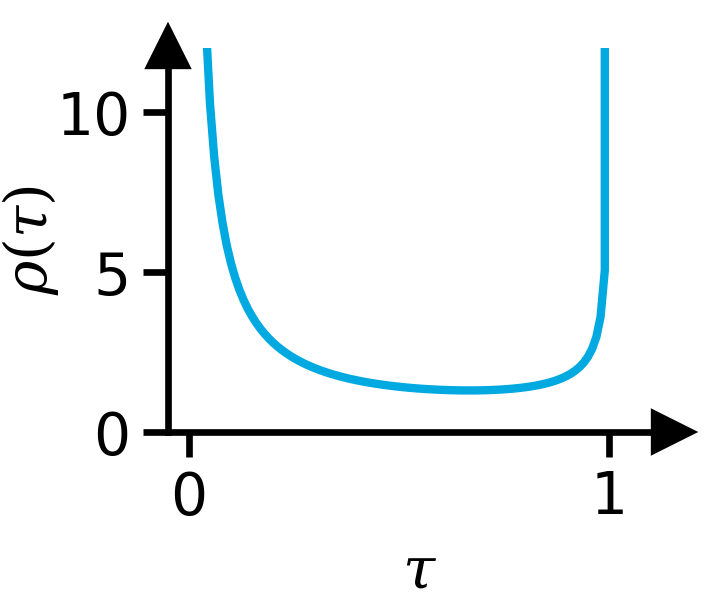

In [34]:
fig, ax = sc.get_figure(figsize=(1.2, 1.0))

ax.plot(tau, rho, color=sc.seeblau100)

ax.set_ylim(0, 12)
ax.set_yticks([0, 5, 10])
ax.set_xlim(-0.05, 1.15)
ax.set_xticks([0, 1])

ylabel = "$\\rho(\\tau)$"
xlabel = "$\\tau$"
title = "theory/meso/ko-rho"

sc.theory_layout(fig, ax, title, xlabel, ylabel)

# ha-current

In [35]:
V = np.linspace(0, 2.5, 501)
V_mV = V * Delta_meV

tau = np.array([1.0, 0.9, 0.66, 0.33, 0.1])
Delta_meV = 0.18
T_K = 0.0
gamma_meV = 1e-7

I = np.full((tau.shape[0], V_mV.shape[0]), np.nan)
dIdV = np.copy(I)

for i, tau_i in enumerate(tau):
    I[i, :] = sc.get_I_ha_nA(
        V_mV=V_mV,
        Delta_meV=Delta_meV,
        tau=tau_i,
        T_K=T_K,
        gamma_meV=gamma_meV,
    ) / (G_0_muS * Delta_meV)
dIdV = np.gradient(I, V_mV / Delta_meV, axis=1)
dIdV[0, 0] = 0

colors = [
    sc.seeblau100,
    sc.seegrau100,
    sc.seeblau65,
    sc.seegrau65,
    sc.seeblau35,
    sc.seegrau35,
    sc.seeblau20,
    sc.seegrau20,
]
figsize = (2.0, 1.2)

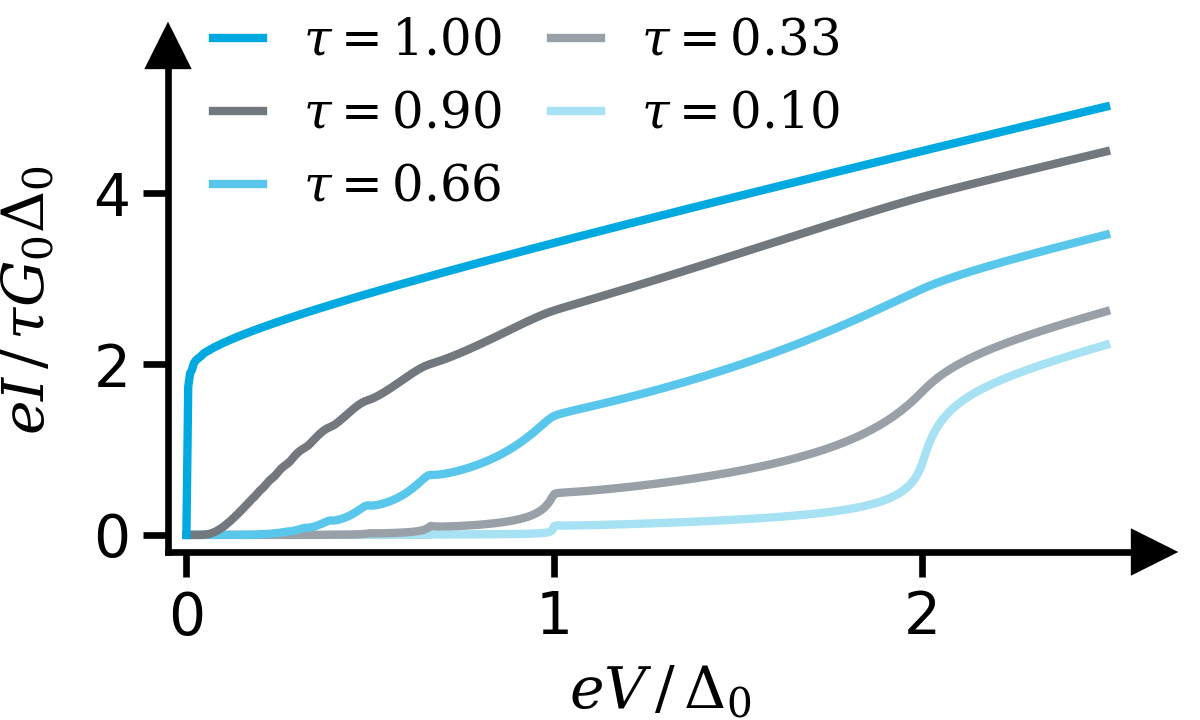

In [36]:
fig, ax = sc.get_figure(figsize=figsize)

for i, tau_i in enumerate(tau):
    ax.plot(
        V_mV / Delta_meV,
        I[i, :] / tau_i,
        color=colors[i],
        zorder=10 - i,
        label=f"$\\tau={tau_i:.2f}$",
    )

ylim = ax.get_ylim()
ax.set_ylim(-0.2, 5.7)
ax.set_xlim(-0.05, None)

ax.legend(
    handlelength=1.0,
    loc="upper left",
    frameon=False,
    fontsize=6,
    title_fontsize=6,
    ncols=2,
    columnspacing=1,
    bbox_to_anchor=(0.0, 1.15),
)

ylabel = "$eI\\,/\\,\\tau G_0\\Delta_0$"
xlabel = "$eV\\,/\\,\\Delta_0$"
title = "theory/meso/ha-iv"

sc.theory_layout(fig, ax, title, xlabel, ylabel)

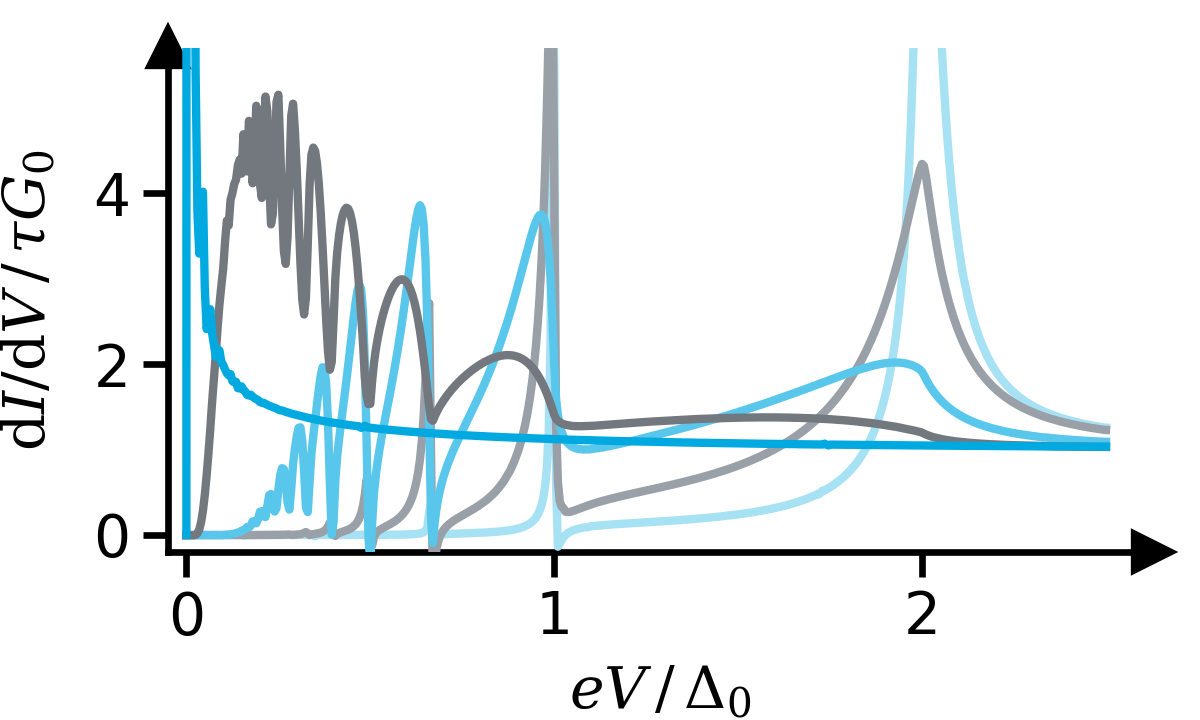

In [37]:
fig, ax = sc.get_figure(figsize=figsize)

for i, tau_i in enumerate(tau):
    ax.plot(
        V_mV / Delta_meV,
        dIdV[i, :] / tau_i,
        color=colors[i],
        zorder=10 - i,
        label=f"$\\tau={tau_i:.2f}$",
    )

ylim = ax.get_ylim()
ax.set_ylim(-0.2, 5.7)
ax.set_xlim(-0.05, None)

ylabel = "$\\mathrm{d}I/\\mathrm{d}V\\,/\\,\\tau G_0$"
xlabel = "$eV\\,/\\,\\Delta_0$"
title = "theory/meso/ha-didv"

sc.theory_layout(fig, ax, title, xlabel, ylabel)

# fcs-current

In [38]:
V = np.linspace(0, 3.5, 351)
tau = np.array([0.9, 0.66, 0.33, 0.1])
M = np.arange(1, 11, 1)

I = np.empty((tau.shape[0], V.shape[0], M.shape[0] + 1))
dIdV = np.copy(I)

Delta_meV = 0.180
gamma_meV = 0.0
T_K = 0.0

for i, tau_i in enumerate(tau):
    I[i, :, :] = sc.get_I_fcs_nA(
        V_mV=V * Delta_meV,
        Delta_meV=Delta_meV,
        tau=tau_i,
        T_K=T_K,
        gamma_meV=gamma_meV,
    ) / (tau_i * G_0_muS * Delta_meV)

dIdV = np.gradient(I, V, axis=1)

I[0, 11, 0] = (I[0, 10, 0] + I[0, 13, 0]) / 2
I[0, 12, 0] = (I[0, 11, 0] + I[0, 13, 0]) / 2

cached values: 351/351
cached values: 351/351
cached values: 351/351
cached values: 351/351


/Users/oliver/Documents/.venv/lib/python3.13/site-packages/colorspacious/ciecam02.py:333: RuntimeWarning: invalid value encountered in divide
  t = (C


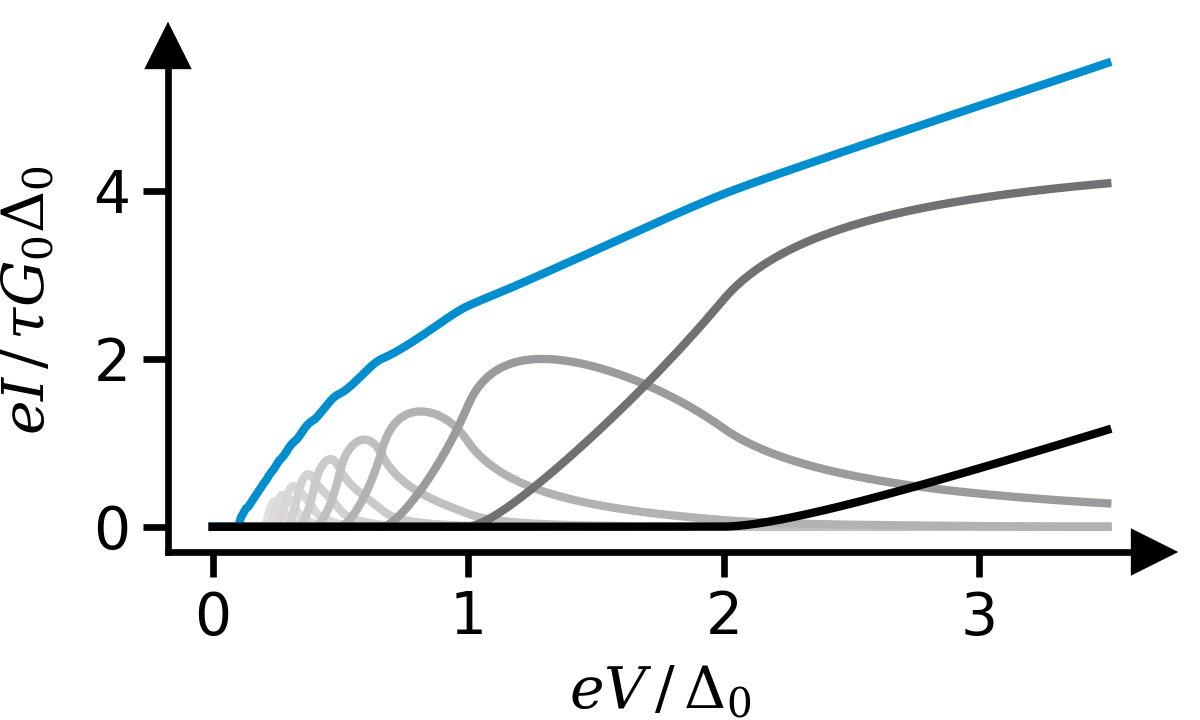

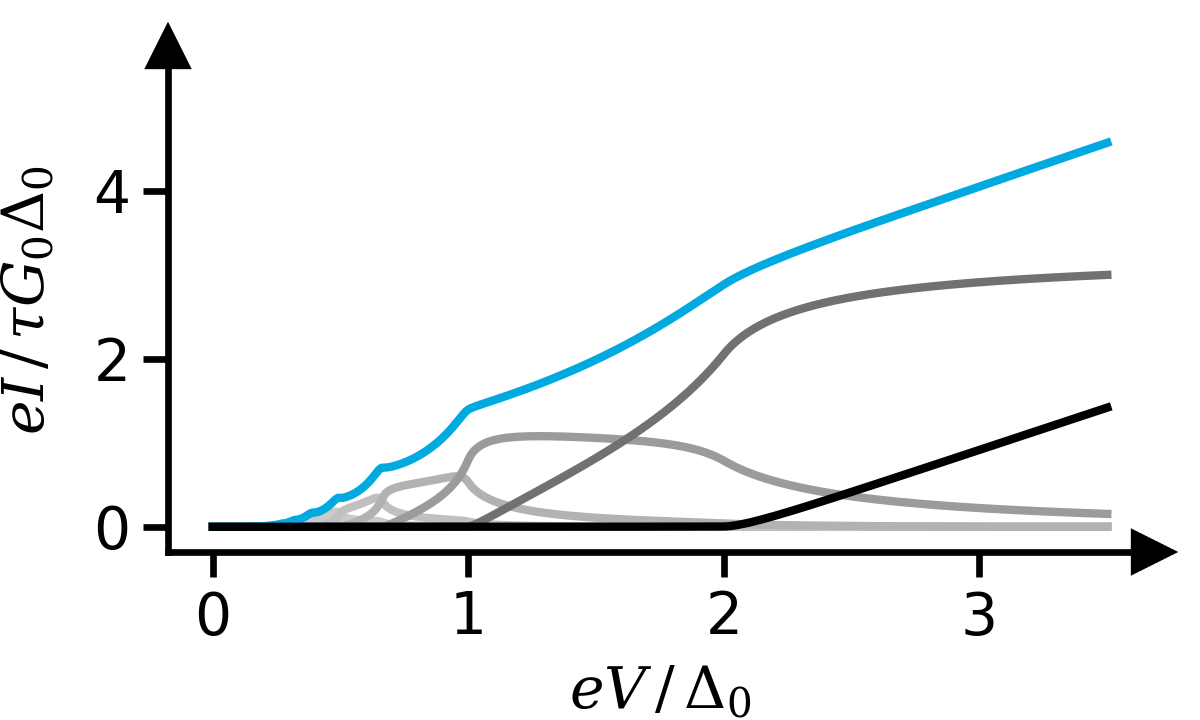

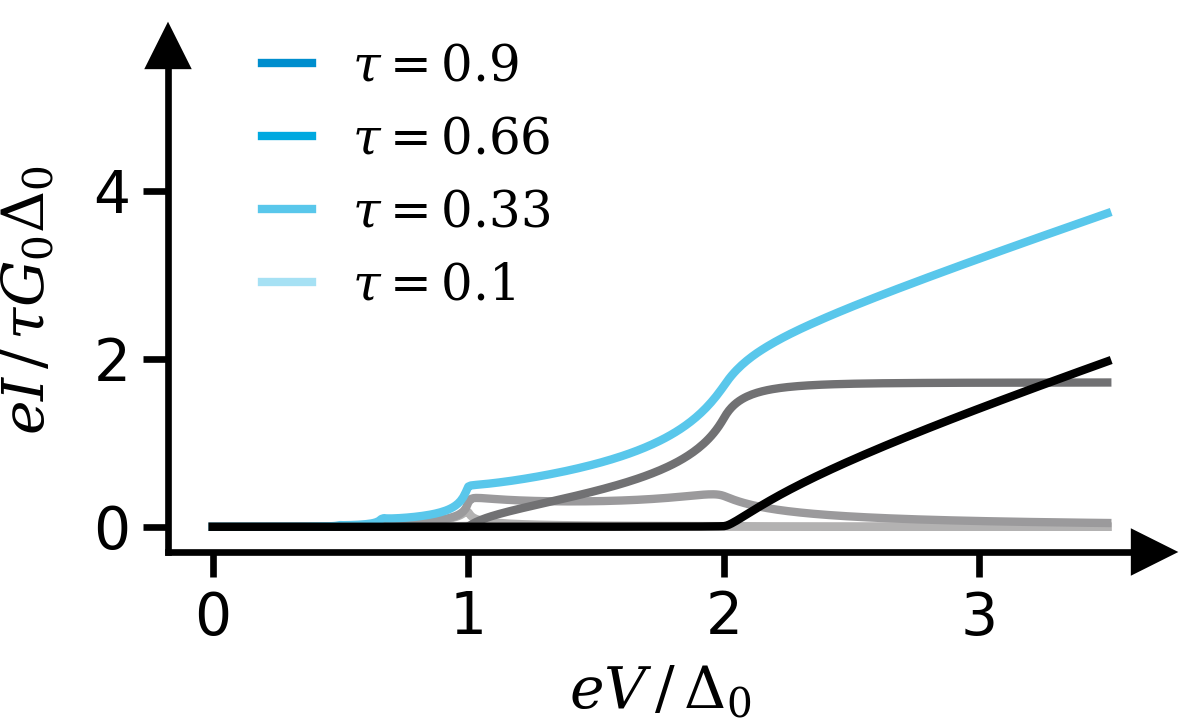

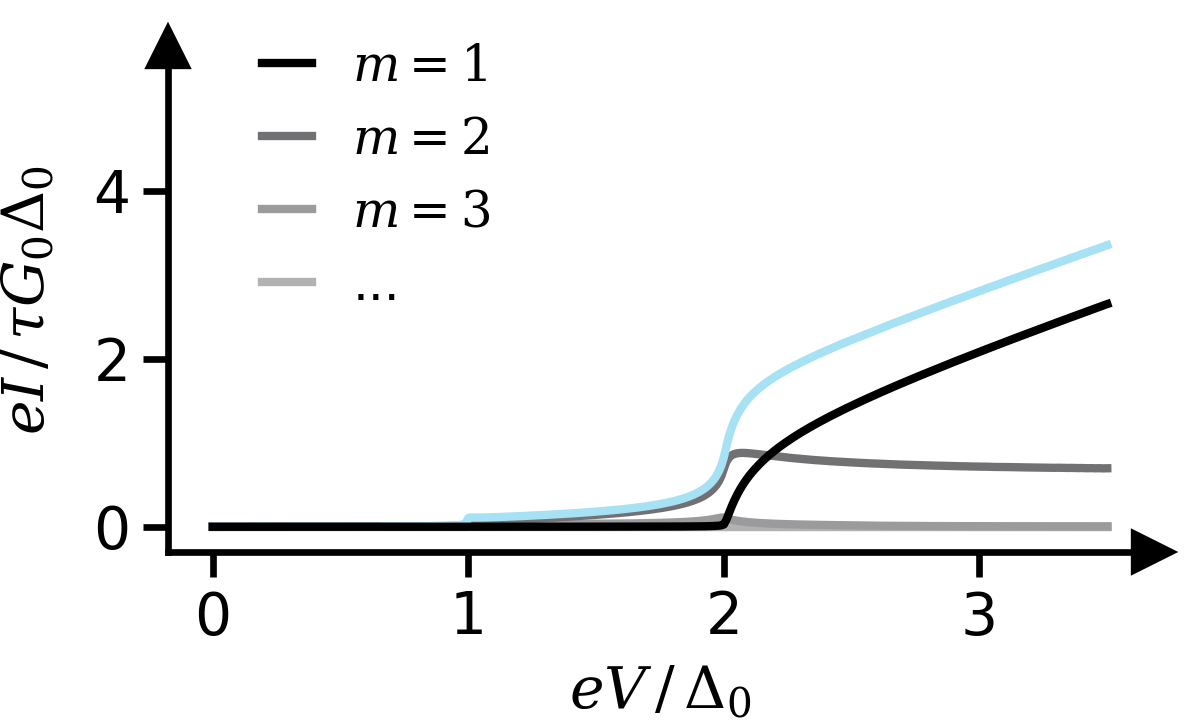

In [39]:
figsize = (2, 1.2)
from superconductivity.style.cpd5 import cmap_tinted_black_to_white

grey = cmap_tinted_black_to_white(sc.seegrau100)

for i_tau, tau_i in enumerate(tau):

    fig, ax = sc.get_figure(figsize=figsize)

    ax.plot(
        V,
        I[i_tau, :, 0],
        # color=seeblau100,
        color=sc.seeblau[i_tau],
        zorder=10,
    )

    for i, m in enumerate(M):
        ax.plot(
            V,
            I[i_tau, :, m],
            color=grey(1 - 1 / (i + 1)),
            zorder=10 - i,
            label=f"{m}",
        )

    if tau_i == tau[-1]:
        index = 3
        handles, labels = [], []
        for i, m in enumerate(M[:index]):
            line_handle = Line2D([0], [0], color=grey(1 - 1 / (i + 1)), linestyle="-")
            label = f"$m={m}$"
            handles.append(line_handle)
            labels.append(label)

        line_handle = Line2D([0], [0], color=grey(1 - 1 / (index + 1)), linestyle="-")
        label = f"..."
        handles.append(line_handle)
        labels.append(label)

        ax.legend(
            handles=handles,
            labels=labels,
            handlelength=1.0,
            loc="upper left",
            frameon=False,
            fontsize=6,
            title_fontsize=6,
            ncols=1,
            columnspacing=1.0,
            bbox_to_anchor=(0.05, 1.1),
        )

    if tau_i == tau[-2]:
        handles, labels = [], []
        for ii_tau, tau_ii in enumerate(tau):
            line_handle = Line2D([0], [0], color=sc.seeblau[ii_tau], linestyle="-")
            label = f"$\\tau={tau_ii}$"
            handles.append(line_handle)
            labels.append(label)

            ax.legend(
                handles=handles,
                labels=labels,
                handlelength=1.0,
                loc="upper left",
                frameon=False,
                fontsize=6,
                title_fontsize=6,
                ncols=1,
                columnspacing=1.0,
                bbox_to_anchor=(0.05, 1.1),
            )

    ax.set_ylim(-0.3, 5.7)

    ylabel = "$eI\\,/\\,\\tau G_0\\Delta_0$"
    xlabel = "$eV\\,/\\,\\Delta_0$"
    title = f"theory/meso/fcs-{int(tau_i*100):03d}"

    sc.theory_layout(fig, ax, title, xlabel, ylabel)

In [121]:
V1 = np.linspace(0.01, 3.5, 350)
V2 = np.linspace(3.6, 10, 65)
V = np.concatenate((V1, V2))
tau = np.array([1.0, 0.9, 0.8, 0.66])
# tau = np.array([0.99, 0.9, 0.8, 0.66])
M = np.arange(1, 11, 1)

I_fcs = np.empty((tau.shape[0], V.shape[0], M.shape[0] + 1))
dIdV_fcs = np.copy(I_fcs)

I_ha = np.empty((tau.shape[0], V.shape[0]))
dIdV_ha = np.copy(I_ha)

Delta_meV = 0.180
gamma_meV = 0.0
T_K = 0.0

for i, tau_i in enumerate(tau):
    I1_fcs = sc.get_I_fcs_nA(
        V_mV=V1 * Delta_meV,
        Delta_meV=Delta_meV,
        tau=tau_i,
        T_K=T_K,
        gamma_meV=gamma_meV,
    ) / (G_0_muS * Delta_meV)

    I2_fcs = sc.get_I_fcs_nA(
        V_mV=V2 * Delta_meV,
        Delta_meV=Delta_meV,
        tau=tau_i,
        T_K=T_K,
        gamma_meV=gamma_meV,
    ) / (G_0_muS * Delta_meV)

    dIdV1_fcs = np.gradient(I1_fcs, V1, axis=0)
    dIdV2_fcs = np.gradient(I2_fcs, V2, axis=0)

    I_fcs[i, : len(V1), :] = I1_fcs
    I_fcs[i, len(V1) :, :] = I2_fcs
    dIdV_fcs[i, : len(V1), :] = dIdV1_fcs
    dIdV_fcs[i, len(V1) :, :] = dIdV2_fcs

    I1_ha = sc.get_I_ha_nA(
        V_mV=V1 * Delta_meV,
        Delta_meV=Delta_meV,
        tau=tau_i,
        T_K=T_K,
        gamma_meV=gamma_meV,
    ) / (G_0_muS * Delta_meV)

    I2_ha = sc.get_I_ha_nA(
        V_mV=V2 * Delta_meV,
        Delta_meV=Delta_meV,
        tau=tau_i,
        T_K=T_K,
        gamma_meV=gamma_meV,
    ) / (G_0_muS * Delta_meV)

    dIdV1_ha = np.gradient(I1_ha, V1, axis=0)
    dIdV2_ha = np.gradient(I2_ha, V2, axis=0)

    I_ha[i, : len(V1)] = I1_ha
    I_ha[i, len(V1) :] = I2_ha
    dIdV_ha[i, : len(V1)] = dIdV1_ha
    dIdV_ha[i, len(V1) :] = dIdV2_ha

I_ha = I_fcs[:, :, 0]
dIdV_ha = dIdV_fcs[:, :, 0]

cached values: 351/351
cached values: 101/101
cached values: 351/351
cached values: 101/101
cached values: 351/351
cached values: 101/101
cached values: 351/351
cached values: 101/101


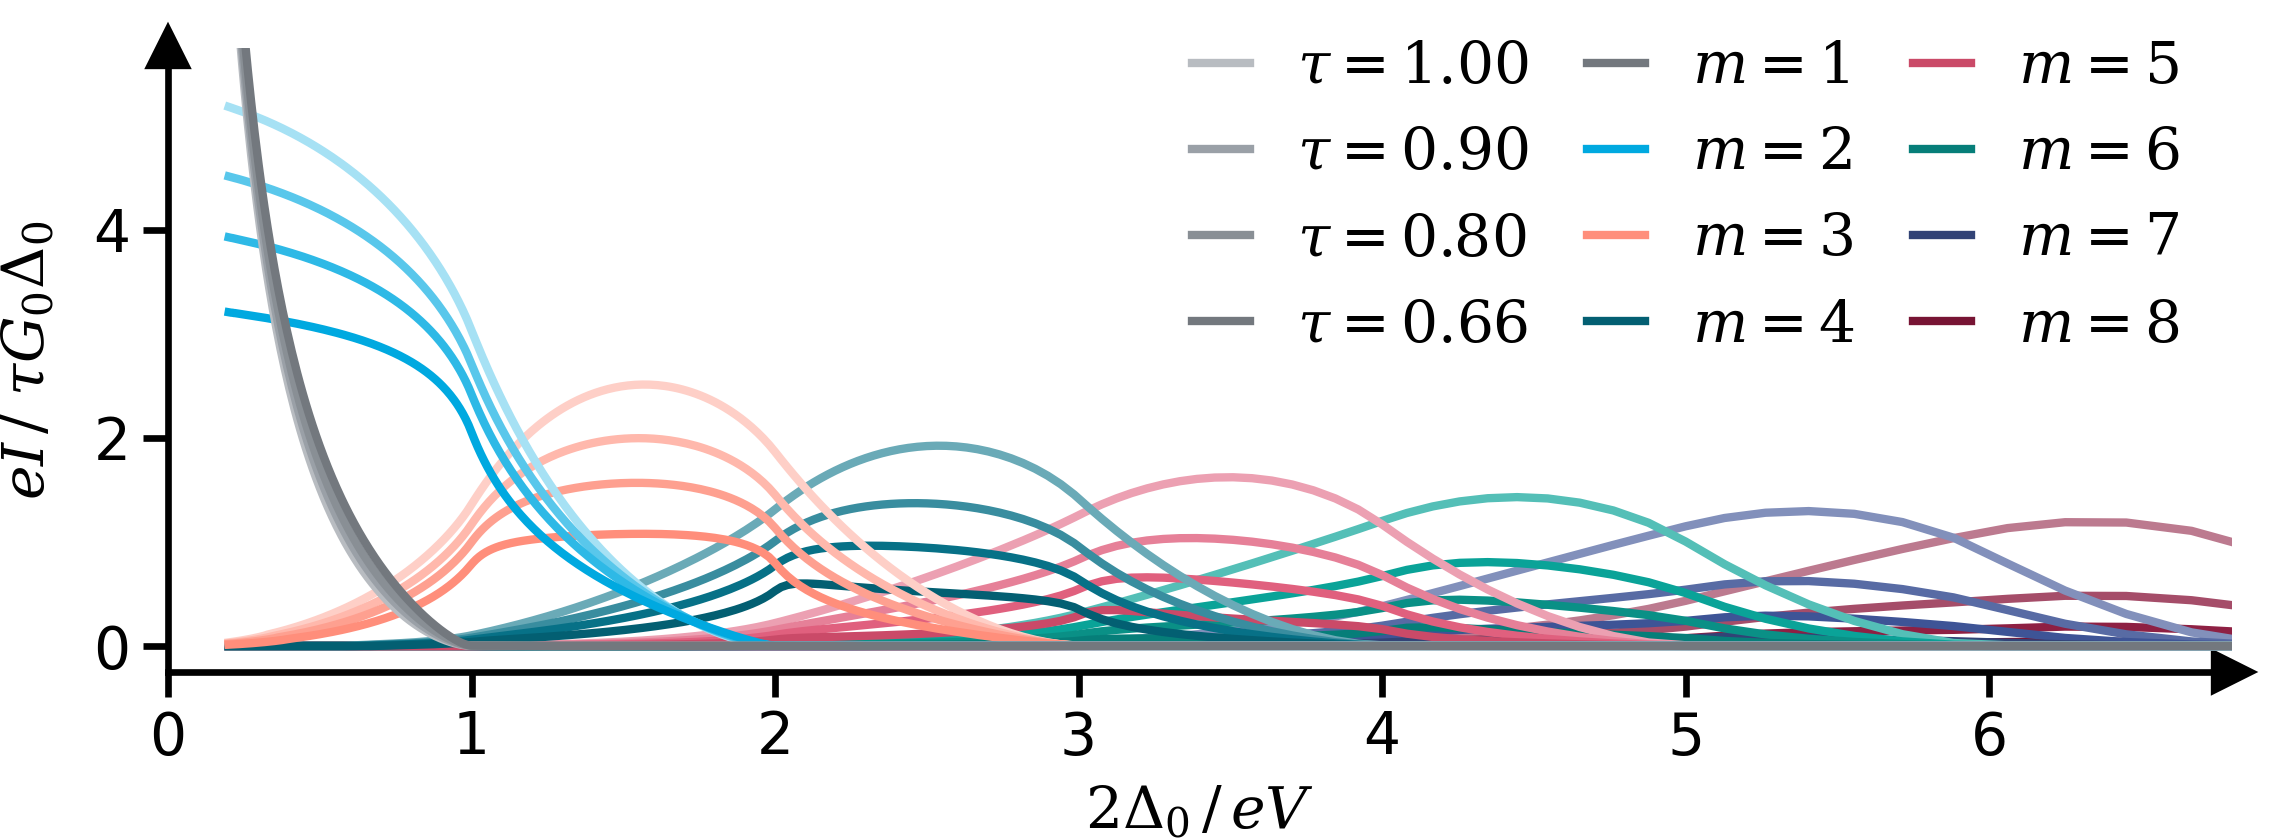

In [122]:
figsize = (3.8, 1.4)
fig, ax = sc.get_figure(figsize=figsize)


color_strings = [
    "seegrau",
    "seeblau",
    "peach",
    "petrol",
    "pinky",
    "seegruen",
    "karpfenblau",
    "bordeaux",
    "seeblau",
]
color_shades = ["100", "80", "65", "35", "20"]
permutation = [
    "standard",
    "standard",
    "standard",
    "standard",
    "standard",
    "standard",
    "standard",
    "standard",
    "magenta",
]


M = np.arange(1, 9)

for i_tau, tau_i in enumerate(tau):
    if i_tau < 4:
        for i_m, m in enumerate(M):
            ax.plot(
                2 / V,
                I_fcs[i_tau, :, m] / tau_i,
                color=sc.get_color(
                    palette=color_strings[i_m],
                    shade=3 - i_tau,
                    permutation=permutation[i_m],
                ),
                zorder=i_tau + (10 - i_m) * 10,
            )

handles, labels = [], []
for i_tau, tau_i in enumerate(tau):
    line_handle = Line2D(
        [0], [0], color=sc.get_color(palette="seegrau", shade=3 - i_tau), linestyle="-"
    )
    label = f"$\\tau={tau_i:.2f}$"
    handles.append(line_handle)
    labels.append(label)

for i_m, m in enumerate(M):
    line_handle = Line2D(
        [0], [0], color=sc.get_color(palette=color_strings[i_m], shade=0), linestyle="-"
    )
    label = f"$m={m}$"
    handles.append(line_handle)
    labels.append(label)

ax.legend(
    handles=handles,
    labels=labels,
    handlelength=1.0,
    loc="upper right",
    frameon=False,
    fontsize=7,
    title_fontsize=7,
    ncols=3,
    columnspacing=1.0,
    bbox_to_anchor=(1.0, 1.1),
)


ax.set_xlim(0, 6.8)
ax.set_ylim(-0.25, 5.75)

# ax.set_xticks([1, 3, 5, 7])
xlabel = "$2\\Delta_0\\,/\\,eV$"

ylabel = "$eI\\,/\\,\\, \\tau G_0\\Delta_0$"
title = f"theory/meso/fcs-iv-m-inv"

sc.theory_layout(fig, ax, title, xlabel, ylabel)

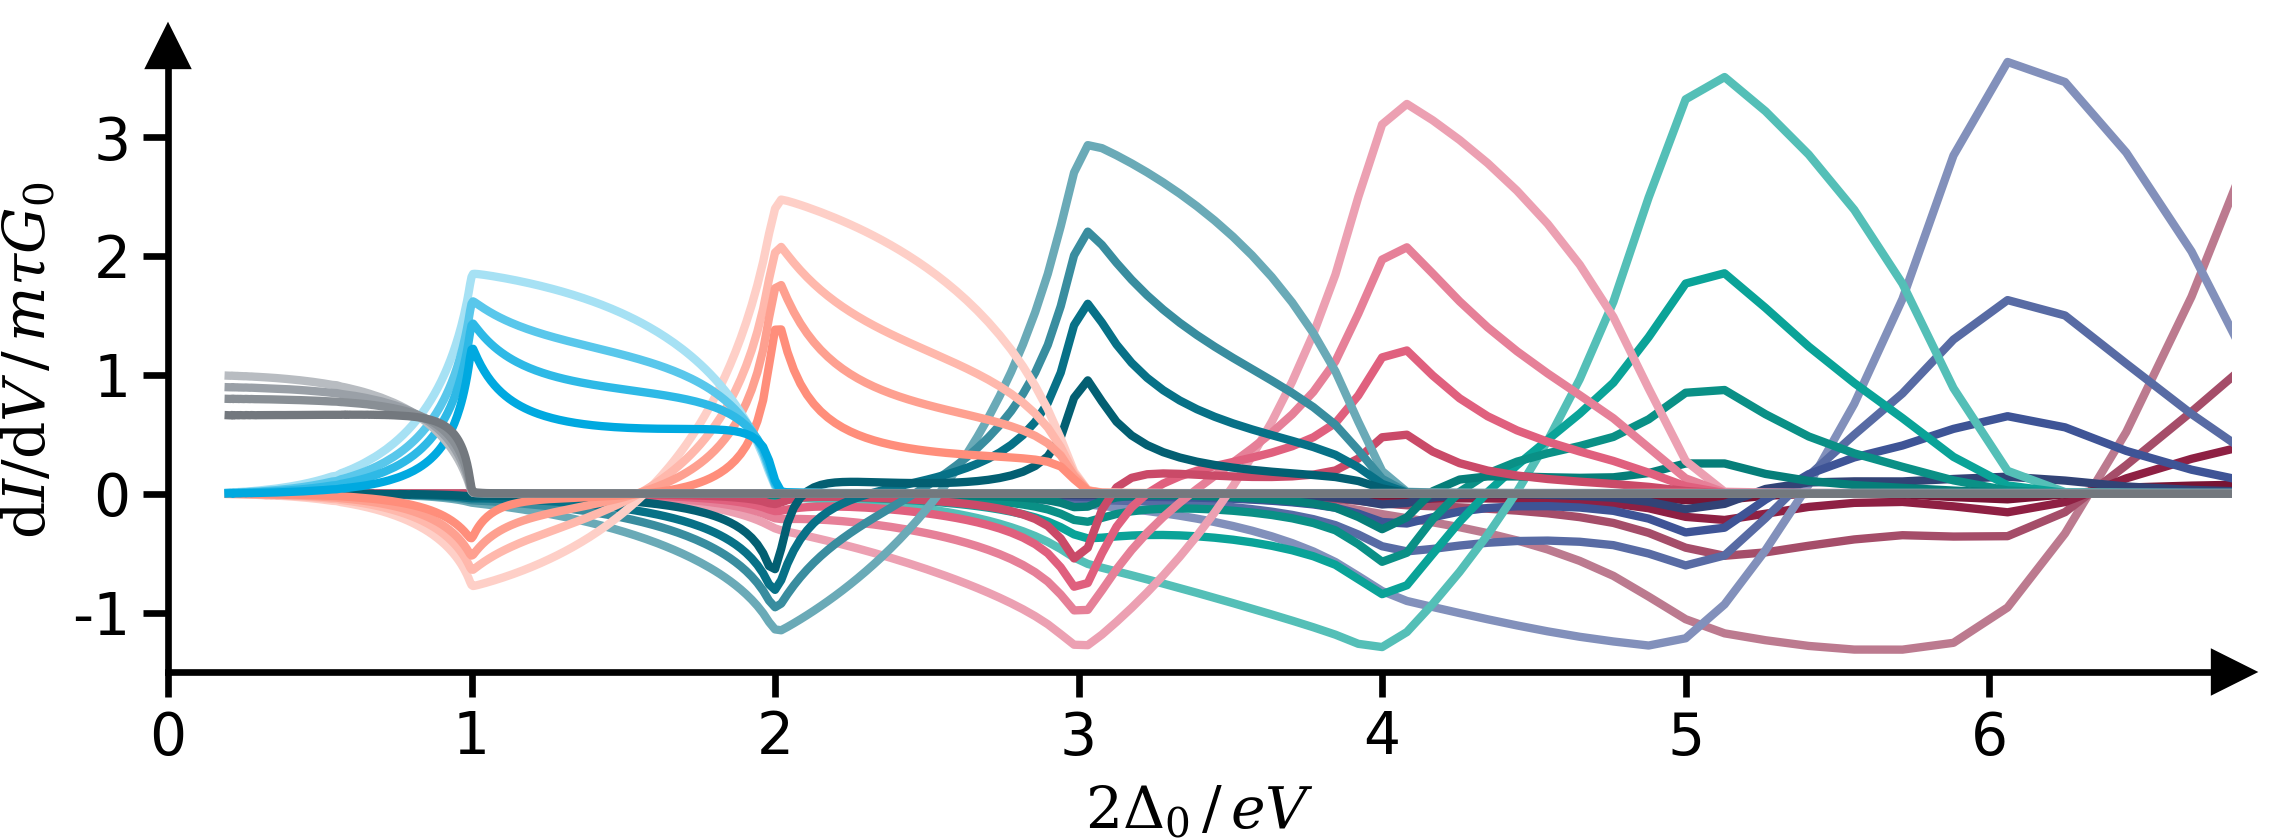

In [138]:
figsize = (3.8, 1.4)
fig, ax = sc.get_figure(figsize=figsize, subfigure=True)

for i_tau, tau_i in enumerate(tau):
    if i_tau < 4:
        for i_m, m in enumerate(M):
            ax.plot(
                2 / V,
                dIdV_fcs[i_tau, :, m] / m,
                color=sc.get_color(
                    palette=color_strings[i_m],
                    shade=3 - i_tau,
                    permutation=permutation[i_m],
                ),
                zorder=i_tau + (10 - i_m) * 10,
            )

ax.set_xlim(0, 6.8)
ax.set_ylim(-1.5, 3.75)
ax.set_yticks([-1, 0, 1, 2, 3])

# ax.set_xticks([1, 3, 5, 7])
xlabel = "$2\\Delta_0\\,/\\,eV$"

ylabel = "$\\mathrm{d}I/\\mathrm{d}V\\,/\\,m\\tau G_0$"
title = f"theory/meso/fcs-didv-m-inv"

sc.theory_layout(fig, ax, title, xlabel, ylabel)

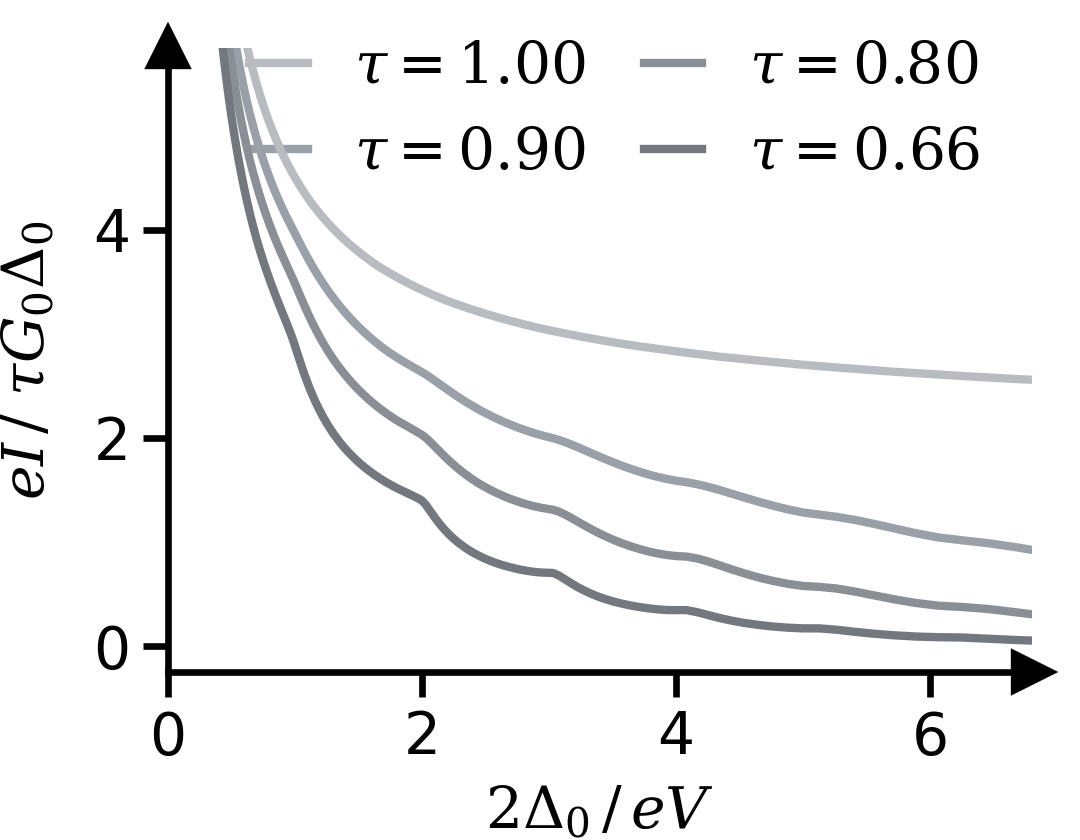

In [124]:
figsize = (1.8, 1.4)
fig, ax = sc.get_figure(figsize=figsize)

M = np.arange(1, 9)

for i_tau, tau_i in enumerate(tau):
    if i_tau < 4:
        ax.plot(
            2 / V,
            I_ha[i_tau, :] / tau_i,
            color=sc.get_color(palette="seegrau", shade=3 - i_tau),
            zorder=i_tau + (10 - i_m) * 10,
        )

handles, labels = [], []
for i_tau, tau_i in enumerate(tau):
    line_handle = Line2D(
        [0], [0], color=sc.get_color(palette="seegrau", shade=3 - i_tau), linestyle="-"
    )
    label = f"$\\tau={tau_i:.2f}$"
    handles.append(line_handle)
    labels.append(label)

ax.legend(
    handles=handles,
    labels=labels,
    handlelength=1.0,
    loc="upper right",
    frameon=False,
    fontsize=7,
    title_fontsize=7,
    ncols=2,
    columnspacing=1.0,
    bbox_to_anchor=(1.0, 1.1),
)


ax.set_xlim(0, 6.8)
ax.set_ylim(-0.25, 5.75)

# ax.set_xticks([1, 3, 5, 7])
xlabel = "$2\\Delta_0\\,/\\,eV$"

ylabel = "$eI\\,/\\,\\, \\tau G_0\\Delta_0$"
title = f"theory/meso/ha-iv-inv"

sc.theory_layout(fig, ax, title, xlabel, ylabel)

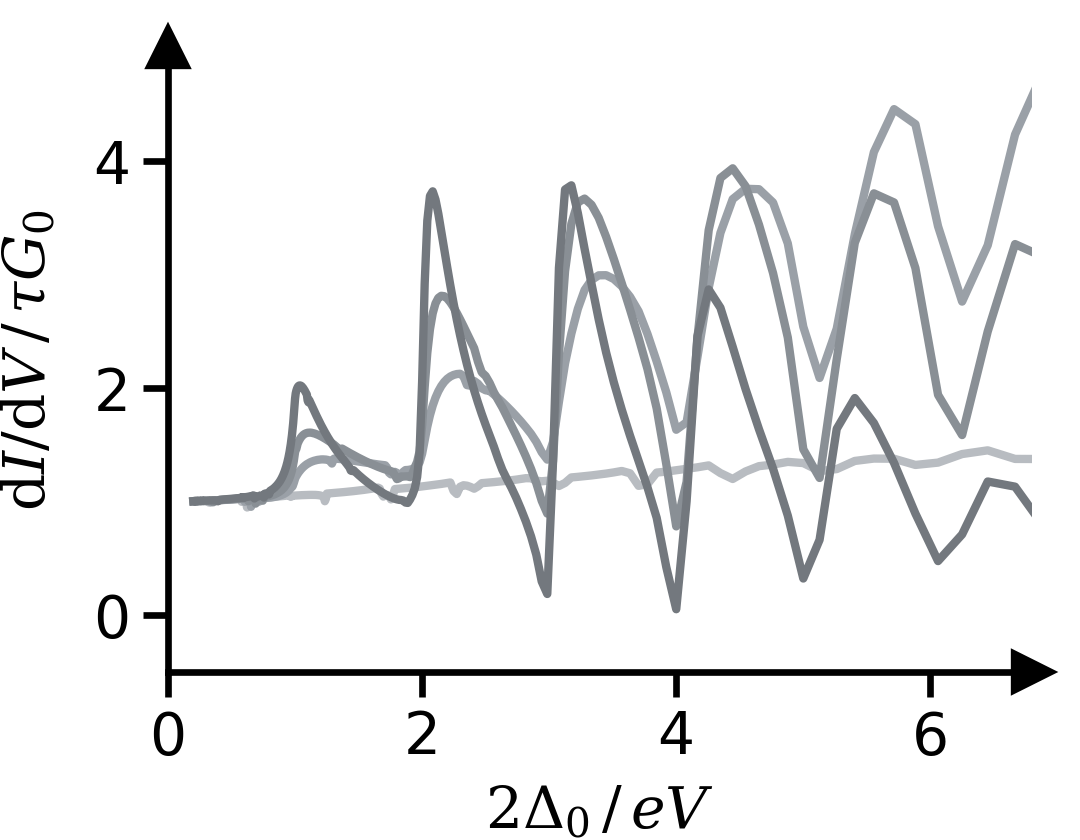

In [125]:
figsize = (1.8, 1.4)
fig, ax = sc.get_figure(figsize=figsize, subfigure=True)

for i_tau, tau_i in enumerate(tau):
    if i_tau < 4:
        ax.plot(
            2 / V,
            dIdV_ha[i_tau, :] / tau_i,
            color=sc.get_color(palette="seegrau", shade=3 - i_tau),
            zorder=i_tau + (10 - i_m) * 10,
        )

ax.set_xlim(0, 6.8)
ax.set_ylim(-0.5, 5)

# ax.set_xticks([1, 3, 5, 7])
xlabel = "$2\\Delta_0\\,/\\,eV$"

ylabel = "$\\mathrm{d}I/\\mathrm{d}V\\,/\\,\\tau G_0$"
title = f"theory/meso/ha-didv-inv"

sc.theory_layout(fig, ax, title, xlabel, ylabel)